CS4375 HW8

Ramesh Kanakala

This is a Python notebook with the purpose of exploring mpg classification with logistic regression and decision tree algorithms.

Step 1

In [1]:
import pandas as pd
df = pd.read_csv('Auto.csv')
#print first few rows
print(df.head())
#dimensions
print(df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
(392, 9)


Step 2

In [2]:
#describe mpg, weight, and year
print(df.loc[:, ['mpg', 'weight', 'year']].describe())

              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


In [3]:
        #range   #average
#mpg     37      23.445918   
#weight  3527    2977.584184   
#year    12      76.010256

Step 3

In [4]:
#check data types
print(df.dtypes)
#change cylinders to categorical with cat.codes
df.cylinders = df.cylinders.astype('category').cat.codes
#change origin to categorical withput cat.codes
df.origin = df.origin.astype('category')
#verify changes
print('\nAfter changes:\n', df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

After changes:
 mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


Step 4

In [5]:
#delete rows with NAs
df = df.dropna()
#new dimensions
print(df.shape)

(389, 9)


Step 5

In [6]:
import numpy as np
#make new mpg_high columns
df['mpg_high'] = np.where(df.mpg > np.mean(df.mpg), 1, 0)
df.mpg_high = df.mpg_high.astype('category').cat.codes
#delete mpg and name columns
df.drop('mpg', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)
#print first few rows to verify
print(df.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


Step 6

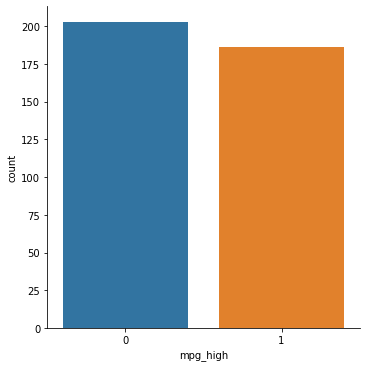

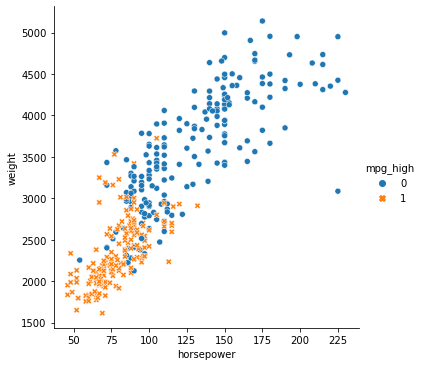

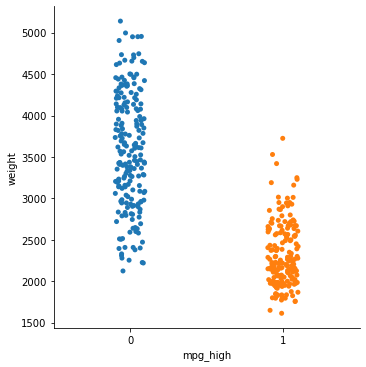

In [7]:
import seaborn as sb
#catplot of mpg_high
sb.catplot(x="mpg_high", kind="count", data=df)
#relplot of horsepower vs weight
sb.relplot(x="horsepower", y="weight",
data=df, hue=df.mpg_high, style=df.mpg_high)
#boxplot of mpg_high vs weight
sb.catplot(x="mpg_high", y="weight", data=df)

In the first graph, we can see there are more vehicles that have an mpg that is less than the average mpg. The difference is very small, however, so the data is still quite balanced in this aspect.

The second graph reveals that vehicles that have an mpg that is less than the average mpg are associated with higher horsepower and higher weight whereas the higher-than-average mpg vehicles have lower horsepower and weight.

The last graph reiterates the difference in weight with less-than-average mpg vehicles having a higher weight and the opposite with lower weight. Something different this graph shows is that the less-than-average mpg vehicles' distribution is more spread out meaning they have a larger variance and represent more different vehicles. The higher-than-average mpg vehicles are more closer together, with lower variance.

Step 7

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:6]
y = df.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1234)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 6)
test size: (78, 6)


Step 8

In [27]:
#logistic regression training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=200)
clf.fit(X_train, y_train)
#test and evaluate metrics
pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.79      0.96      0.87        28

    accuracy                           0.90        78
   macro avg       0.89      0.91      0.89        78
weighted avg       0.91      0.90      0.90        78



Step 9

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.82      0.96      0.89        28

    accuracy                           0.91        78
   macro avg       0.90      0.92      0.91        78
weighted avg       0.92      0.91      0.91        78



[Text(215.40441176470588, 205.35999999999999, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(145.24411764705883, 181.2, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(93.54705882352941, 157.04, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(49.23529411764706, 132.88, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(19.694117647058825, 108.72, 'X[0] <= 0.5\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(9.847058823529412, 84.56, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(29.541176470588237, 84.56, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(19.694117647058825, 60.400000000000006, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(9.847058823529412, 36.24000000000001, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(29.541176470588237, 36.24000000000001, 'X[3] <= 2385.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(19.69411764705882

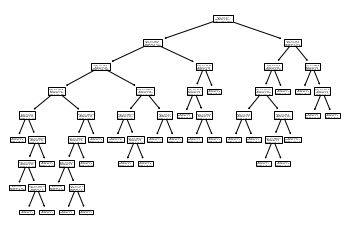

In [31]:
#decision tree training
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
#test and evaluate metrics
pred2 = clf2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))
#tree plot
from sklearn import tree
tree.plot_tree(clf2) 

Step 10

The decision tree algorithm performed better than the logistic regression algorithm as seen with the overall higher precision and recall scores and related higher f1 scores (f1 is the harmonic mean between precision and recall) that the decision tree has. The tree also has a higher macro avg., weighted avg., and accuracy. 

Looking more specifically by class, we see that precision metrics for class 0 (vehicles with mpg less than mean mpg) is the same for both algorithms but class 1 precision is higher for the decision tree. On the other hand, class 1 recall is the same for both algorithm but class 0 recall is still higher for decision trees. Again, the f1 scores are higher for both classes for the decision tree and finally, the accuracy is also higher.

The decision tree may have outperformed logistic regression in this case as the relationship between mpg_high and the other predictors might not be too linear and complex and has multiple splits. Logistic regression on the other hand assumes only a single decision boundary which might not be the case here. Decision trees have multiple boundaries that are parallel to axes, and with simple rules that can divide vehicles into separate groups, as we saw with the weight and mpg_high plot, it can excel.